# Adidas Sales EDA

# Introduction

Within the dynamic retail landscape, the examination of sales data stands as a crucial element in shaping strategic decisions. This project centers around the analysis of Adidas sales data, with the goal of extracting insightful observations, identifying patterns, and revealing opportunities for growth. Utilizing Python and data analysis libraries, the objective is to present a comprehensive view of Adidas' sales performance over a specified period.

![Adidas Banner](https://wallpapers.com/images/hd/adidas-ag-silhouette-logo-g3vn73l2uunde7h2.jpg)

# Data Description

* Retailer: The entity or organization selling Adidas products.
* Retailer ID: A unique identifier for each retailer.
* Invoice Date: The date when the sales transaction occurred.
* Region: The geographical region where the retailer operates.
* State: The state within the region where the retailer is located.
* City: The city where the retailer is situated.
* Product: The Adidas product being sold.
* Price per Unit: The cost of one unit of the Adidas product.
* Units Sold: The number of units of the Adidas product sold in a particular transaction.
* Total Sales: The total revenue generated from the sale of Adidas products in a transaction.
* Operating Profit: The profit earned by the retailer from the sale after deducting operating costs.
* Operating Margin: The percentage of operating profit in relation to total sales.
* Sales Method: The method or channel through which the sales transaction occurred.

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go


In [2]:
df = pd.read_excel("/kaggle/input/adidas-sales-dataset/Adidas US Sales Datasets.xlsx")
#Reading the excel file

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


# Data Cleaning

In [4]:
df = df.drop(df.index[0:3]) #Removing First 3 rows

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True) #Dropping first colums

In [6]:
df.columns = df.iloc[0] #Changing the column names

In [7]:
df = df.drop(df.index[0]) #Dropping the first row as it contains column names

In [8]:
df = df.reset_index(drop=True) #Reseting the index and droping the existing index 

In [9]:
df.duplicated().sum() #Checking whether the dataset have duplicated values

0

In [10]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [12]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date']) #Changing datatype of Invoice Date to datetime

In [13]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [14]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin']].astype("float")
#Changing the datatype of Price per Unit', 'Units Sold', 'Total Sales','Operating Profit', 'Operating Margin' columns to float

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 980.0+ KB


In [16]:
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day

In [17]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1,5


# Data Visualization

# Top Selling Product Category

In [18]:
Top_prod = df.groupby('Product').agg({"Units Sold" : "sum"}).sort_values(by = "Units Sold", ascending = False).reset_index()
Top_prod

3,Product,Units Sold
0,Men's Street Footwear,593320.0
1,Men's Athletic Footwear,435526.0
2,Women's Apparel,433827.0
3,Women's Street Footwear,392269.0
4,Women's Athletic Footwear,317236.0
5,Men's Apparel,306683.0


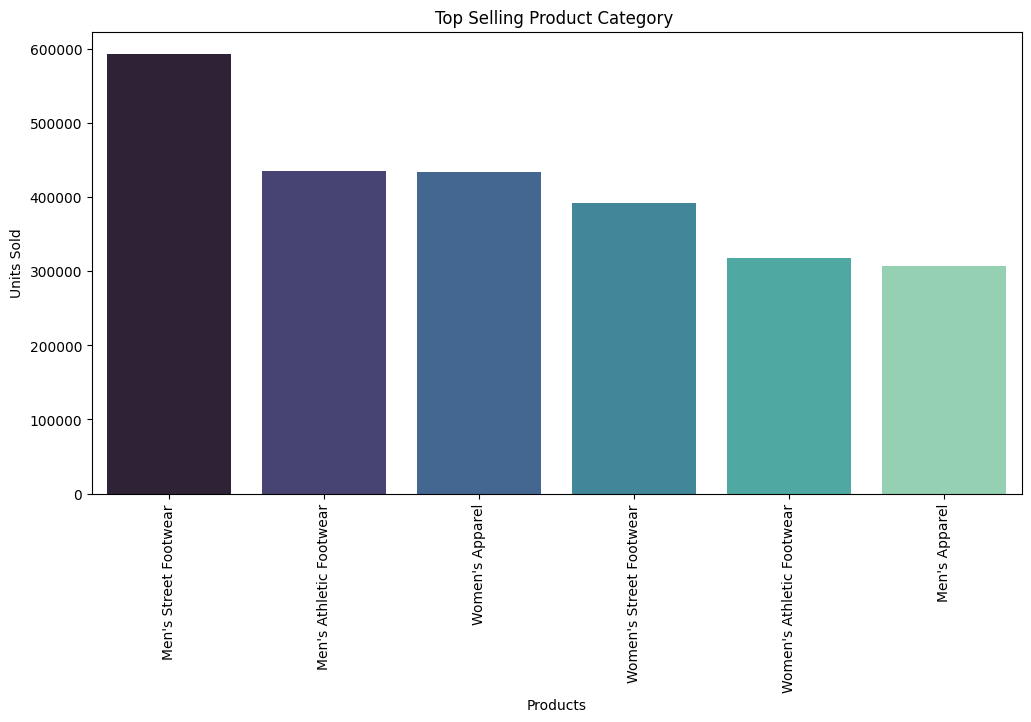

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_prod["Product"], y=Top_prod["Units Sold"], palette = "mako")
plt.title('Top Selling Product Category ')
plt.xlabel('Products')
plt.ylabel('Units Sold')
plt.xticks(rotation = "vertical")
plt.show()

**Observations**

* The top selling category is Men's Street Footwear, followed by Men's Athletic Footwear.
* Women's Apparel holds 3rd place.
* Men's Apparel holds last place.

# Total Sales by Region

In [20]:
region_sales = df.groupby('Region').agg({'Total Sales':"sum"}).reset_index()
region_sales

3,Region,Total Sales
0,Midwest,135800459.0
1,Northeast,186324067.0
2,South,144663181.0
3,Southeast,163171236.0
4,West,269943182.0


In [21]:
px.pie(region_sales, values='Total Sales', names='Region', title='Total Sales by Region')

**Observations**

* The majority of the sales are done by the West followed by the Northwest region
* 15.1% of the sales are done by the Midwest region, making it a minor contributor to the total sales 


# Operating Profit by Retailer

In [22]:
profit_by_retailer = df.groupby('Retailer').agg({'Operating Profit' : "sum"}).reset_index().sort_values(by='Operating Profit', ascending=False)
profit_by_retailer

3,Retailer,Operating Profit
5,West Gear,85667873.18
1,Foot Locker,80722124.81
3,Sports Direct,74332954.96
2,Kohl's,36811252.58
0,Amazon,28818503.31
4,Walmart,25782052.61


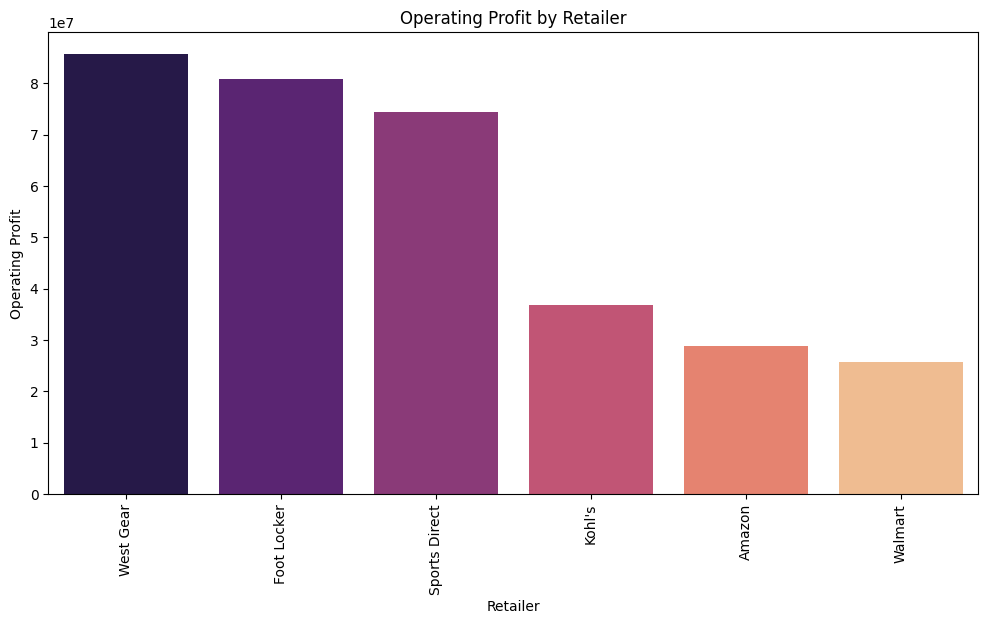

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Retailer', y='Operating Profit', data=profit_by_retailer,palette = "magma")
plt.title('Operating Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.xticks(rotation="vertical")
plt.show()

**Observations**

* West Gear leads with the Operating profit of 85.67 million dollars
* The top 2nd (Foot Locker) and 3rd (Sports Direct) closely compete with each other with a profit of 80.72 million  and 74.33 million.
* Kohl's, Amazon, and Walmart have significant contributions, but when compared to the top 3 their contributions are less.

# Top and Bottom Selling State and City

In [24]:
df['City_State'] = df['City'] + ', ' + df['State'] #Considering city names alone does not make sense, as some states have common city names.

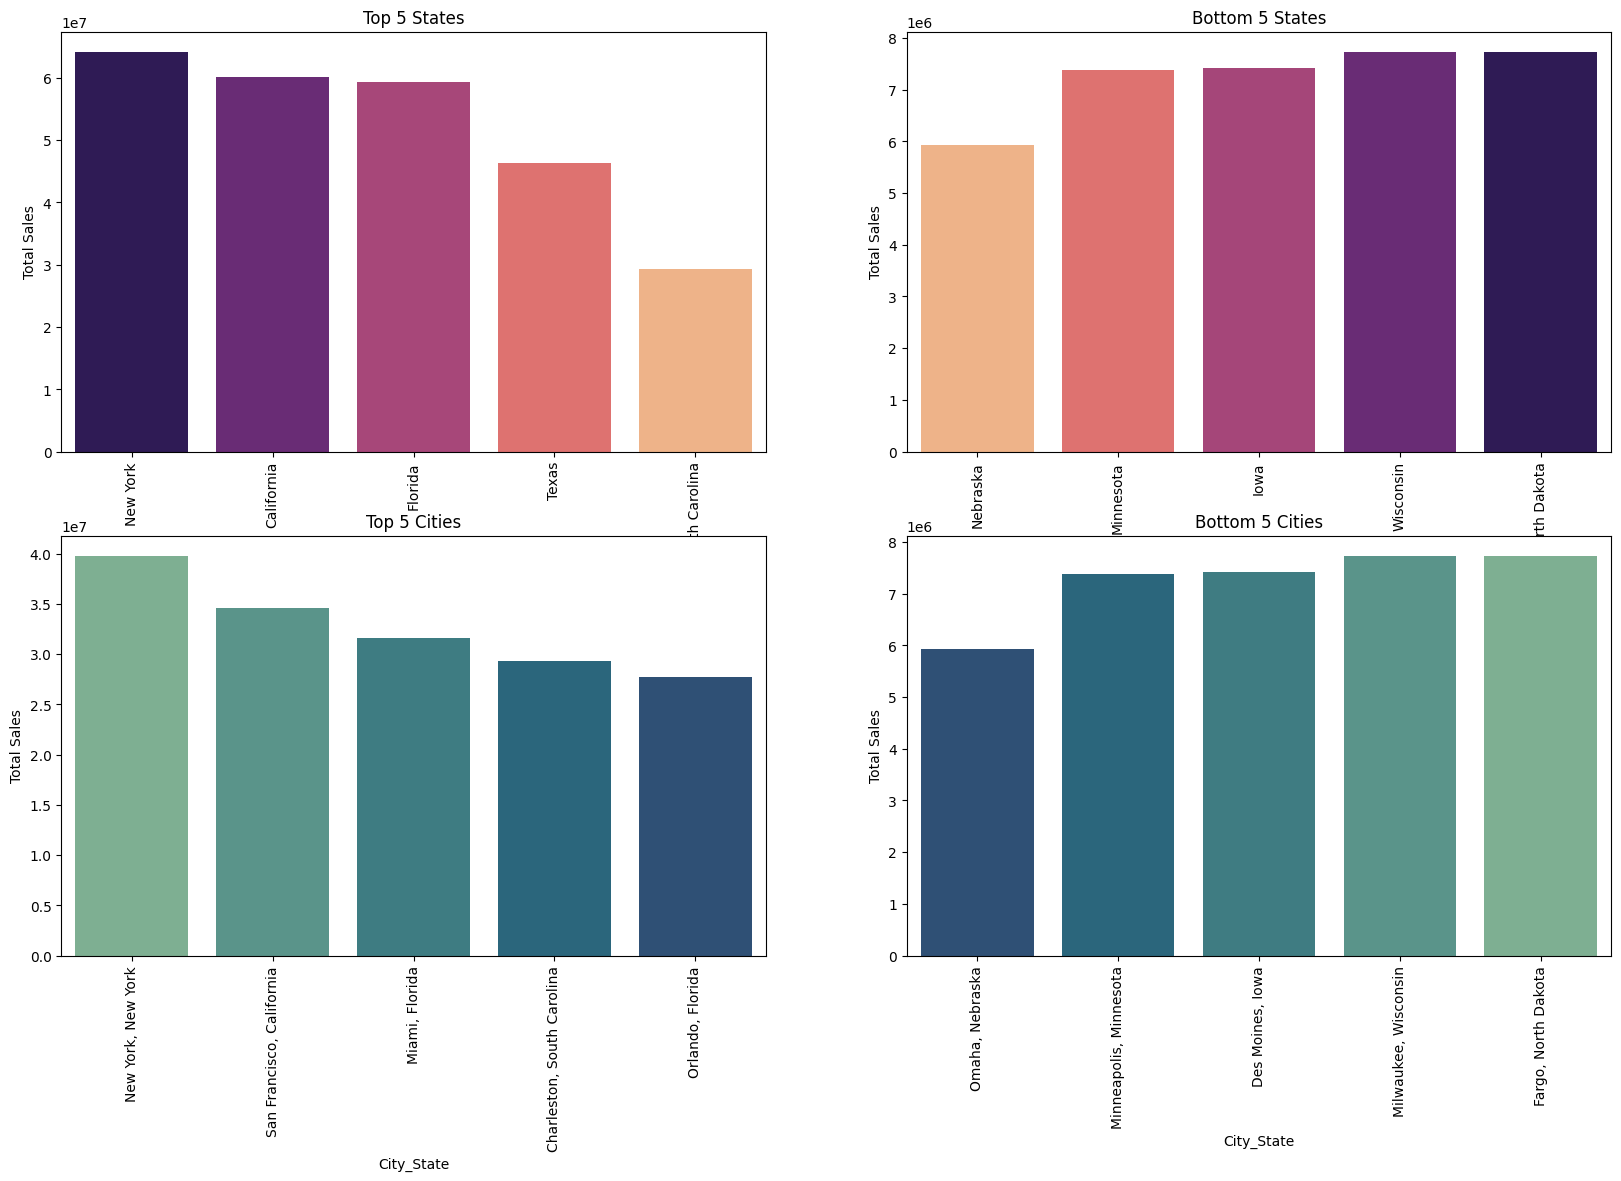

In [25]:
top_states = df.groupby('State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_states = df.groupby('State')['Total Sales'].sum().nsmallest(5).reset_index()

top_cities = df.groupby('City_State')['Total Sales'].sum().nlargest(5).reset_index()
bottom_cities = df.groupby('City_State')['Total Sales'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

sns.barplot(x='State', y='Total Sales', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='State', y='Total Sales', data=bottom_states,palette='magma_r', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 States')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x='City_State', y='Total Sales', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=90) 

sns.barplot(x='City_State', y='Total Sales', data=bottom_cities, palette='crest_r' , ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Cities')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.show()

**Observations**

* New York state holds first place with total sales of 64.22 million dollars. 
* California and Florida have close competition for second place
* Nebraska is the least-selling state with 5.92 million dollars.
* While the other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales of around 7 million dollars.
* New York City holds first place with sales of 39.80 million dollars, followed by San Francisco with sales of 34.53 million dollars.
* Omaha is the least-selling city with 5.92 million dollars followed by Minneapolis, Des Moines, Milwaukee and  Fargo




# Sales Method by Total Sales

In [26]:
sales_method_pie = df.groupby('Sales Method')['Total Sales'].sum().reset_index()

In [27]:
colors = ['#99FFDE', '#ffde99', '#de99ff']

In [28]:
px.pie(sales_method_pie, values='Total Sales', names='Sales Method', title='Sales Method by Total Sales', hole=0.4,color_discrete_sequence=colors)

**Observations**

The majority 39.6 % of the sales are In-Store followed by Outlet at 32.8% and Online at 27.5%.

# Price Per Product Distribution

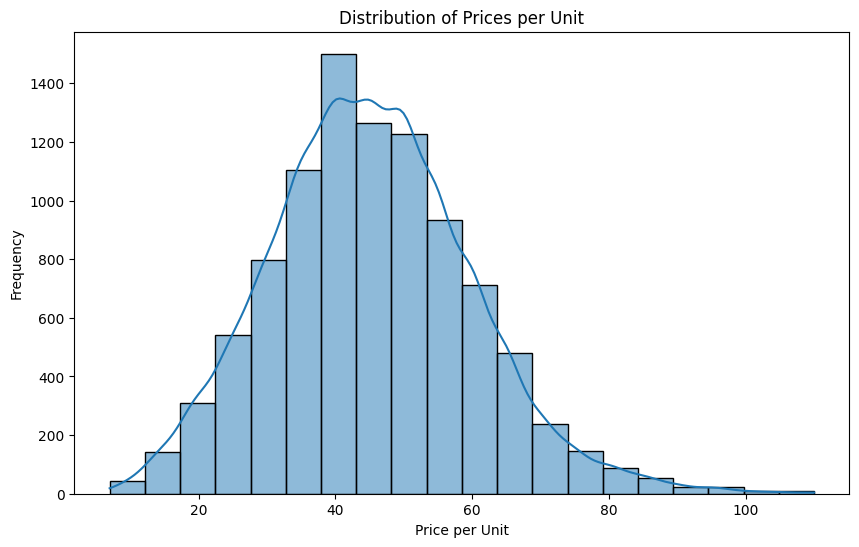

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per Unit'], bins = 20, kde = True)
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

**Observations**

* The price per unit follows a normal distribution. It peaks at 40 dollars, which means the 40 dollars price point is the most common.
* The majority of the products have prices between 20 dollars and 80 dollars.

# Price per Unit vs Total Sales

In [30]:
px.scatter(df, x='Price per Unit', y='Total Sales', title='Price per Unit vs Total Sales', color = "Product")

**Observations**

* Products with the prices of 60, 65 and 70 are making more sales.
* We can clearly see that there is a positive relationship between price per unit and total sales. If price per unit increases, profit is also increasing. 
* It's apparent that the sales of men's street footwear are the highest in total.

# Monthly Total Sales Over Years

In [31]:
yearly_sales = df.groupby(['Year','Month'])['Total Sales'].sum().reset_index()
yearly_sales

,Year,Month,Total Sales
0,2020,1,16253746.0
1,2020,2,14997988.0
2,2020,3,17660577.0
3,2020,4,24607006.0
4,2020,5,16918014.0
5,2020,6,8829819.0
6,2020,7,17146013.0
7,2020,8,19877980.0
8,2020,9,18304436.0
9,2020,10,10836269.0


In [32]:
px.line(yearly_sales, x='Month', y='Total Sales', color='Year',title='Monthly Total Sales Over Years', markers=True, template= "none")

In [33]:
df.groupby('Year')['Total Sales'].sum().reset_index()

,Year,Total Sales
0,2020,182080675.0
1,2021,717821450.0


**Observations**

The sales have shown significant growth from 2020 to 2021.

**2021** 

* There was a dip in sales during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
* The month of July had the highest sales with 78.33 million dollars.
* In terms of sales, March generated the lowest revenue of 39.14 million dollars.
* Total Sales 717.82 million dollars

**2020**

* There was a rise in sales in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
* The month of April had the highest sales with 24.60 million dollars.
* In terms of sales, December generated the lowest revenue of 8.02 million dollars.
* Total Sales 182.08 million dollars

# Monthly Total Profit Over Years

In [34]:
yearly_profit = df.groupby(['Year','Month'])['Operating Profit'].sum().reset_index()
yearly_profit

,Year,Month,Operating Profit
0,2020,1,5830005.41
1,2020,2,5207354.44
2,2020,3,5862006.26
3,2020,4,9301293.34
4,2020,5,5870841.95
5,2020,6,2292727.41
6,2020,7,4917665.11
7,2020,8,7338924.54
8,2020,9,7119702.44
9,2020,10,4139469.21


In [35]:
px.line(yearly_profit, x='Month', y='Operating Profit', color='Year',title='Monthly Total Profit Over Years', markers=True, template= "simple_white")

In [36]:
pd.options.display.float_format = '{:.0f}'.format

df.groupby('Year').agg({"Operating Profit" : "sum"})

3,Operating Profit
Year,
2020,63375663
2021,268759099


**Observations**

The Profit have shown significant growth from 2020 to 2021.

**2021** 

* There was a dip in profit during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
* The month of July had the highest profit with 29.13 million dollars.
* In terms of profit, March generated the lowest profit of 14.57 million dollars.
* Total profit 268.75 million dollars

**2020**

* There was a rise in profit in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
* The month of April had the highest profit with 9.30 million dollars.
* In terms of profit, June generated the lowest profit of 2.29 million dollars.
* Total profit 63.37 million dollars

# Treemap for Adidas Sales by Region and State

In [37]:
px.treemap(df, path=['Region', 'State'], values='Total Sales',
                 title='Treemap for Adidas Sales by Region and State')

**Observations**

* In the **West**, California has the highest sales, while Utah has the least sales.
* In the **Northeast**, New york has the highest sales, while Maryland has the least sales.
* In the **Southeast**, Florida has the highest sales, while Kentucky has the least sales.
* In the **South**, Texas has the highest sales, while Oklahoma has the least sales.
* In the **Midwest**, Michigan has the highest sales, while Nebraska has the least sales.

# Pair Plot for Multiple Metrics

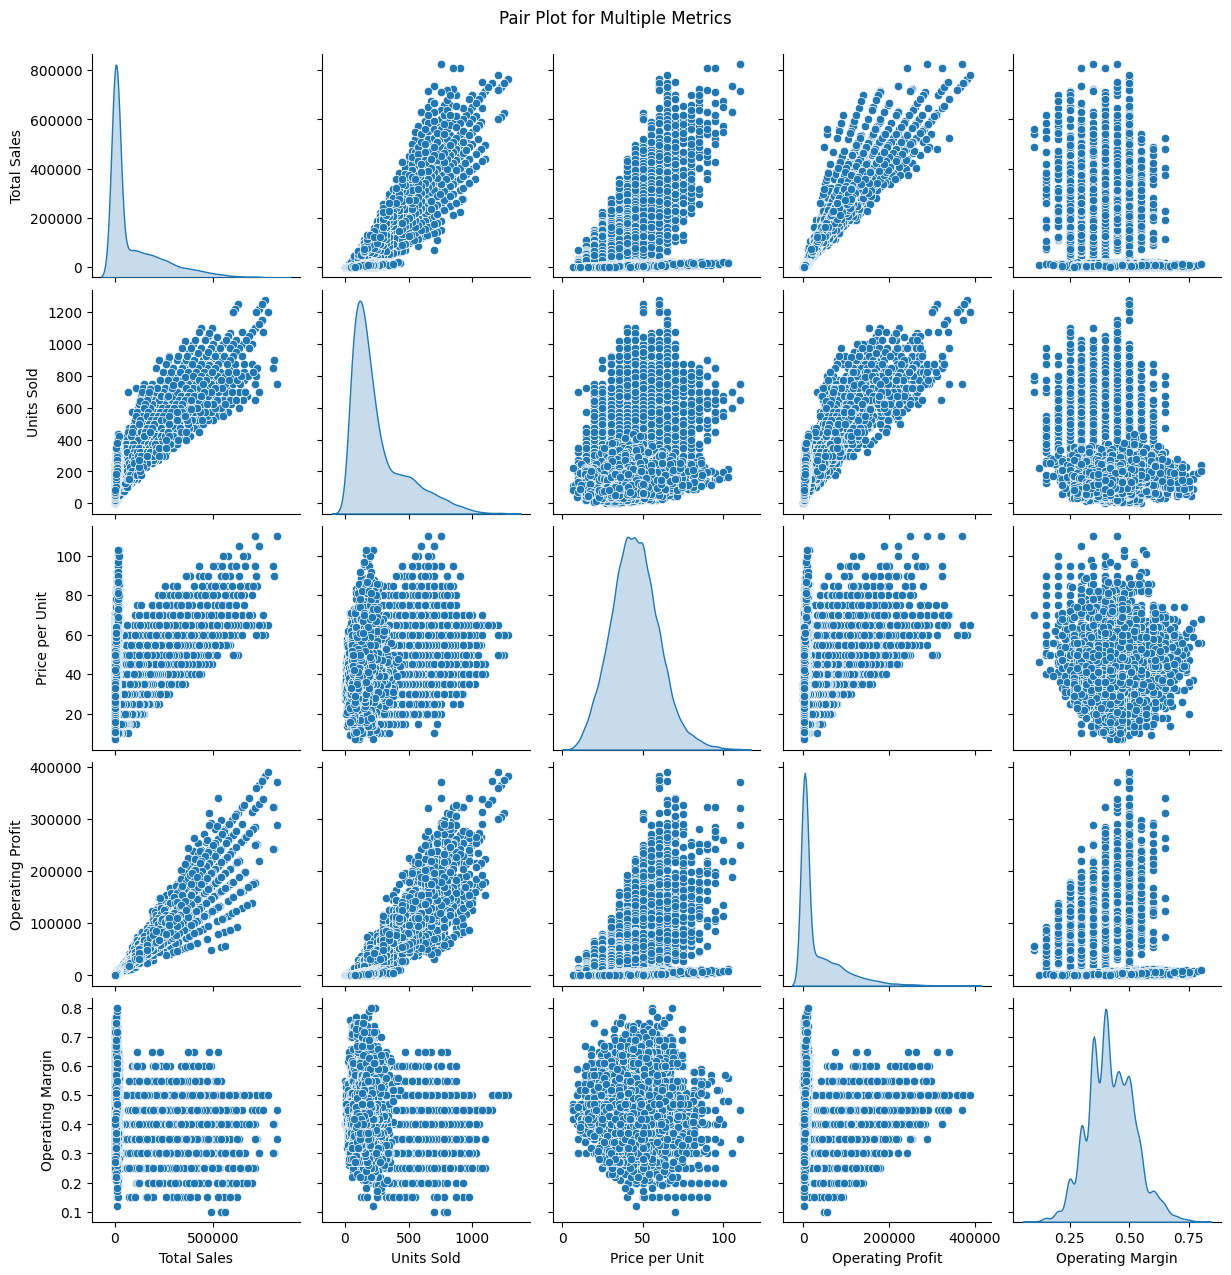

In [38]:
sns.pairplot(df[['Total Sales', 'Units Sold', 'Price per Unit', 'Operating Profit', 'Operating Margin']], diag_kind='kde', palette='muted')
plt.suptitle('Pair Plot for Multiple Metrics', y=1.02)
plt.show()

**Observations**

* There is a positive relationship between total sales and price per unit.
* The number of units sold tends to increase when there is an increase in total sales.
* The price per unit ranges from 7 Dollars to 110 Dollars.
* A majority of the price per unit falls between 35 Dollars and 55 Dollars.
* As sales increase, the profit also tends to increase.
* The profit margin typically falls between 25% and 75%.

# Conclusions


**Product Category Analysis:**

**Top Selling Product Category:**

* Men's Street Footwear is the top-selling category, followed by Men's Athletic Footwear.
* Women's Apparel holds the 3rd place, while Men's Apparel is the least-selling category.

**Regional Sales Analysis:**

* The West region leads in total sales, followed by the Northwest.
* The Midwest contributes to only 15.1% of total sales, making it a minor contributor.

**Retailer Performance:**

* West Gear leads in operating profit, followed closely by Foot Locker and Sports Direct.
* Kohl's, Amazon, and Walmart have significant contributions but are less compared to the top 3.

**State and City Sales Analysis:**

* New York state has the highest total sales, and New York City is the top-selling city.
* Nebraska is the least-selling state, and Omaha is the least-selling city.
* The other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales around 7 million dollars.

**Sales Method and Pricing:**

* The majority of sales (39.6%) are In-Store, followed by Outlet (32.8%) and Online (27.5%).
* Price per unit follows a normal distribution, peaking at 40 Dollars.

**Price per Unit vs Total Sales:**

* Products priced at 60 Dollars, 65 Dollars, and 70 Dollars have higher sales.
* There is a positive relationship between price per unit and total sales.

**Monthly Sales and Profit Trends:**

* Sales and profit show significant growth from 2020 to 2021.
* Peaks in sales and profit are observed in July for both years.
* December has the lowest sales and profit for both years.

**Regional Sales Distribution:**

* The treemap visually represents sales distribution across different regions and states.
* It highlights the top-selling states in each region.

**Overall Insights:**

This report gives a thorough picture of Adidas' sales performance across all product categories, geographical areas, retailers, and sales methods. Strategic decisions require knowledge of the best-performing product categories, regions, and merchants. The relationship between price per unit and overall sales is favorable, which points to the potential for improving product pricing strategies.

The analysis also identifies seasonal patterns in sales and profit, highlighting the significance of efficient inventory control and marketing plans during busy times. The regional sales distribution can also direct resource allocation and targeted marketing campaigns to increase sales in particular regions.

For Adidas to experience greater development and profitability, critical business choices such as inventory planning, marketing initiatives, and regional focus regions can be informed by the information gleaned from this analysis.